## This notebook shows the performance of a model that predicts emotion from text.
In the imports for huggingface it seems pytorch is needed.

In [2]:
import torch
import os
import pandas as pd
import seaborn as sns
from transformers import AutoTokenizer, RobertaForSequenceClassification

/home/volter/.pyenv/versions/3.10.6/envs/project_name/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
##Import model, tokenizer etc.

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")

model = RobertaForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")


##Test on a string
inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
with torch.no_grad():

    logits = model(**inputs).logits
    
predicted_class_id = logits.argmax().item()

model.config.id2label[predicted_class_id]
##Returns emotion optimism

'optimism'

## Below we define functions to get the emotion as well as the maximum value that related to the prediction (float)

In [21]:
def yield_prediction(comment:str)->str:
    inputs = tokenizer(comment, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class_id = logits.argmax().item()
    return model.config.id2label[predicted_class_id]

def yield_prediction_confidence(comment:str)->str:
    inputs = tokenizer(comment, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
    return logits.amax()

### We load ruddit for testing

In [5]:
data_path = os.path.join(os.pardir, 'raw_data', 'ruddit_comments_score.csv')
df = pd.read_csv(data_path)
df=df[df["body"]!="[deleted]"]
df.head(10)

,comment_id,body,score
0,cza1q49,> The difference in average earnings between m...,-0.083
1,cza1wdh,"The myth is that the ""gap"" is entirely based o...",-0.022
3,cza2bw8,The assertion is that women get paid less for ...,-0.146
4,cza2iji,You said in the OP that's not what they're mea...,-0.083
5,cza2jj3,>Men and women are not payed less for the same...,-0.042
6,cza31e2,"> All the wage gap is, is an average of total ...",-0.021
11,cza37ue,"No, the point is they aren't talking about dis...",-0.174
13,cza392y,So women are paid less for the same job?,-0.229
16,cza3m1b,"But obviously that doesn't make sense, does it...",0.000
17,cza3r5u,I think that Hollywood and professional sports...,0.098


In [6]:
first_1000=df.head(1000)
first_1000["emotions"]=first_1000["body"].apply(yield_prediction)


/tmp/ipykernel_11436/479452405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_1000["emotions"]=first_1000["body"].apply(yield_prediction)


In [7]:
##Count emotions. We notice that at least for the first 1000 joy is overrepresented greatly.
first_1000.groupby("emotions").count()["comment_id"]

emotions
anger       188
joy         635
optimism     69
sadness     108
Name: comment_id, dtype: int64

### Then, we take the time to plot and observe the emotions, the comments related to them and how the emotions relate to the scoring in the ruddit set.

/home/volter/.pyenv/versions/3.10.6/envs/project_name/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/volter/.pyenv/versions/3.10.6/envs/project_name/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Coyotes and wolves are pack hunters so it is unlikely that you would come across just one. Dogs, coyotes, and wolves have fangs and claws and you do not. They will always go for the weakest part and then All they have to do is get in one bite and hold on with their super strong jaws and shake. And no matter how speedy you are, they are faster. The only way a large stick could help is if you throw it.
The problem is that wolfs generally hunt in packs so even if you got one down the other would team up on you
You are actually spot on here. I ha e stopped claiming I’m part of one political party for this reason.
Walmart does not pay a sales tax. 
I've never seen people kneel during services for veterans, such as military funerals.  They give the military salute.
Viewership is going up? When did this happen? 
You should post your problem to /r/redesign, it's the place for everything related to the new design.

I haven't heard anyone having the problems you are having, so it is almost certa

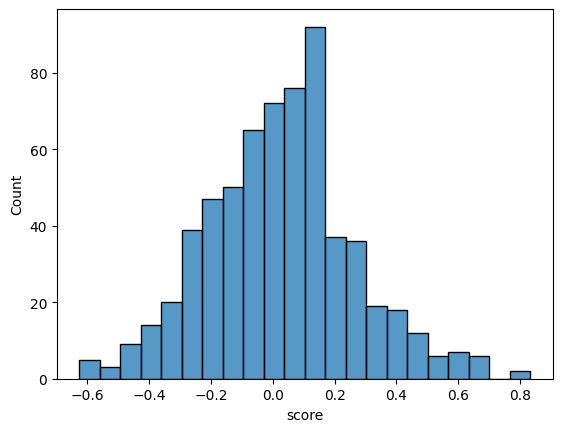

In [8]:
sns.histplot(data=first_1000[first_1000["emotions"]=="joy"],x="score")
for i in first_1000[(first_1000["emotions"]=="joy") & (first_1000["score"]<-0.4)]["body"]:
    print(i)

/home/volter/.pyenv/versions/3.10.6/envs/project_name/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


No dog's teeth are 3.5 inches long. 
I was talking about travel. If you don't leave your home you can't travel. 
He said it was a hypothetical situation.
I know. But that it’s such a common part of our social narrative means that those efforts are clearly insufficient. 
How does one describe an end user on a site such as reddit?
Yeah I could have done better
But you are still cooling your "hot" chocolate with whipped cream. Milk doesn't retain it's heat very well, so you end up with luke warm chocolate milk
if you get distracted for some reason (urgent phone call, sudden house fire, etc.) you end up either with a soggy disgusting marshmallow, or creamy warm chocolate, which is still quite nice


/home/volter/.pyenv/versions/3.10.6/envs/project_name/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


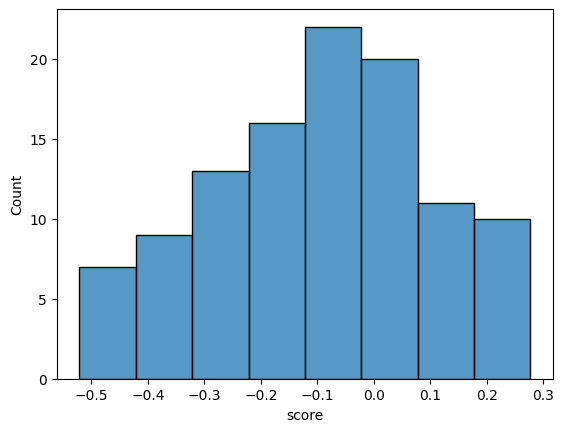

In [9]:
sns.histplot(data=first_1000[first_1000["emotions"]=="sadness"],x="score")
for i in first_1000[(first_1000["emotions"]=="sadness") & (first_1000["score"]<-0.4)]["body"]:
    print(i)

So you agree that its not a biological difference.
Because it's what commonly happens. There's what can and what is. 

What is is getting better, but we still have work to do. 
Can you put the scientific method itself to this test?
I'll probably forget but if you know how the remind me thing works feel free to tag this comment and we can continue our discussion
Well, there is only one way to REALLY find out!
There's no need to exaggerate to make the point. 
Same goes for humans. Also, we can climb trees
My CMV is about safety, not profit. 
Sure, if it's private, why not?
I'd rather see a percentage of stocks go to each household that had their taxes contributed to the stadium or some other structure that allows the people to benefit financially over time.
The one argument in favor for taxpayer support for a new stadium: if building the stadium will return economic advantage to the same area in excess of the taxation required (through tourism, jobs, increased property values etc). In ad

/home/volter/.pyenv/versions/3.10.6/envs/project_name/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/volter/.pyenv/versions/3.10.6/envs/project_name/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


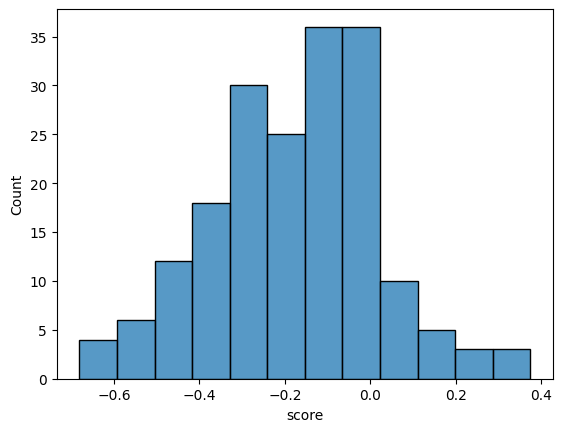

In [10]:
sns.histplot(data=first_1000[first_1000["emotions"]=="anger"],x="score")
for i in first_1000[(first_1000["emotions"]=="anger") & (first_1000["score"]<-0.4)]["body"]:
    print(i)

## What we observe is that the comments don't usually display very strong emotions and the emotion itself isn't very indicative of the score in ruddit.